# **1. PERKENALAN**

Nama    : Al Izhar Iqrami

Batch   : 011

GC      : 3

**QUERY MEMPEROLEH DATASET**

----

select *

from `ftds-hacktiv8-project.phase1_assignments.heart-failure`

**GAMBARAN DATASET**

----

Data yang diolah ialah data terkait penyakit agagal jantung. Adapaun faktor-faktor yang diberikan ialah sebagai berikut

`Age` : Usian

`Anaemia` : Penurunan sel darah merah atau hemoglobin (1 : ya, 0 : tidak)

`Creatinie phosphokinase` : Tingkat enzim CPK dalam darah (mcg/L)

`Diabetes` : Pasien penderita diabetes (1 : ya, 0 : tidak)

`Ejaction fraction` : Persentase darah yang meninggalkan jantung pada setiap kontraksi (persentase)

`High blood pressure` : Pasien Hipertensi (1 : ya, 0 : tidak )

`Platelets` : Trombosit dalam darah (kiloplatele/mL)

`Serum creatinine` : Kadar kreatinin serum dalam darah (mg/dl)

`Serum sodium` : Kadar natrium serum dalam darah (mEq/L)

`Sex` : Pria atau wanita (1 : pria, 0 : wanita)

`Smoking` : Pasien merokok atau tidak (1 : ya, 0 : tidak)

`Time` : Periodik tindak lanjut (hari)

`Death Even` : Pasien gagal jantung meninggal selama masa tindak lanjut (1 : ya, 0 : tidak)

**PROBLEM**

----

Buatlah model Classification menggunakan `Random Forest` dan salah satu `algoritma boosting` untuk `memprediksi apakah seorang pasien akan meninggal atau tidak` menggunakan dataset yang sudah Anda dapatkan.

# **2. IMPORT LIBRARY**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle 
import ast

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer


from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

Melakuakn import library yang berguna untuk membatu memecahkan permasalahan yang diperolah pada saat melakuakan analisis data

# **3. DATA LOADING**

In [2]:
df = pd.read_csv('heart-failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


In [3]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


## Check Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Terlihat bahwa data yang kita miliki berjumlah 299 baris dan 13 kolom, serta tidak terdapat data yang null

## Copy Dataset

In [5]:
data = df.copy()

Menduplicate data original agar supaya jika terdapat kesalahan pada proses pengolahan data kami dapat dengan mudah memperoleh data original kembali.

## Check Data Duplicate

In [6]:
data.duplicated().sum()

0

Tidak terdapat data yang duplikat pada dataset

## Check Missing Value

In [7]:
cek = pd.DataFrame(data.isnull().sum(), columns=['No. of missing values'])
cek['% missing_values'] = (cek/len(df)).round(2)*100
cek

,No. of missing values,% missing_values
age,0,0.0
anaemia,0,0.0
creatinine_phosphokinase,0,0.0
diabetes,0,0.0
ejection_fraction,0,0.0
high_blood_pressure,0,0.0
platelets,0,0.0
serum_creatinine,0,0.0
serum_sodium,0,0.0
sex,0,0.0


Terlihat bahwa data yang dimiliki telah bersih dari adanya missing value

## Check Korelasi 

In [8]:
korelasi = data.corr()
print(korelasi['DEATH_EVENT'].sort_values(ascending=False), '\n')

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64 



Terdapat beberapa kolom yang memiliki korelasi baik terhadap target yaitu `serum_creatinine`, dan `age`

# **4. Exploratory Data Analysis (EDA)**

## Visualisasi Death Event (Target)

Text(0.5, 1.0, 'DEATH EVENT')

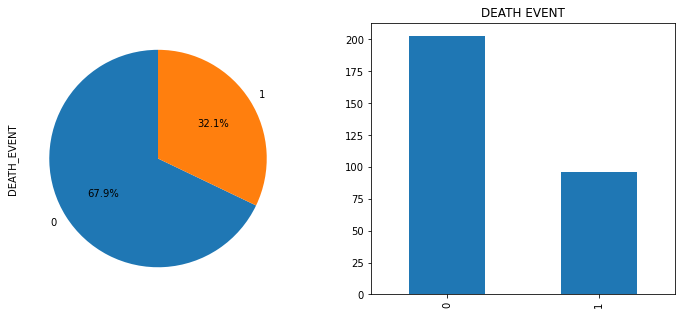

In [9]:
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
data['DEATH_EVENT'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[0])
data['DEATH_EVENT'].value_counts().plot(kind='bar', ax=axs[1])
plt.title('DEATH EVENT')

Terlihat bahwa data pada kolom Death Event didomonasi oleh label 0 (hidup) dengan persentase 67.9% daripada label 1 (Meninggal) dengan persentase 32.1%

## Death Event vs Age

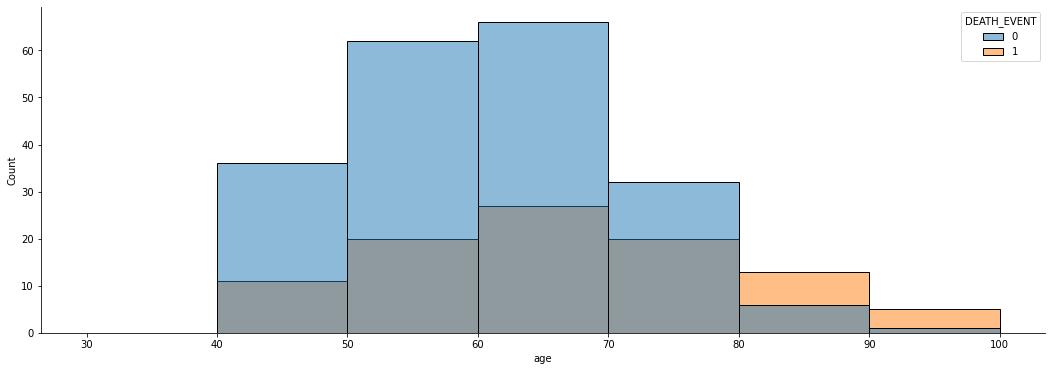

In [10]:
bins = [30, 40, 50, 60, 70, 80, 90, 100]
plt.figure(figsize=(18, 6))
sns.histplot(data=data, x="age", bins=bins, hue="DEATH_EVENT")
sns.despine(top=True, right=True)

- Terlihat bahwa age lumayan berpengaruh terhadap paseian yang meninggal dengan penyakit jantung. Hal ini dapat dilihat dari rentang usia 80 - 90 tahuan yang memiliki peluang meninggal lebih besar dibandingkan dengan rentang usia yang 70 tahun kebawah.

- Pasien dengan penyakit jantung yang meninggal tertinggi berada pada usia 60 - 70 tahun. Hal ini tentunya memberi informasi kepada kita bahwa sangat sedikit jumlah pasien yang melewati usia 70 tahun keatas. Sehingga kasus kematian terbanyak berada pada rentang usia tersebut.

## Death Event vs Anaemia

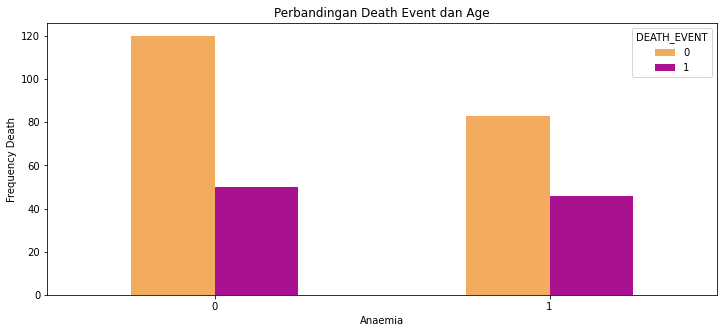

In [11]:
pd.crosstab(data.anaemia, data.DEATH_EVENT).plot(kind="bar",figsize=(12,5),color=["#F3AB60",'#AA1190'])
plt.title('Perbandingan Death Event dan Age')
plt.xlabel('Anaemia')
plt.xticks(rotation = 0)
plt.ylabel('Frequency Death')
plt.show()

Pasien tanpa gejala anemia lebih banyak yang mengalami kematian dengan penyakit jantung dibandingkan yang memiliki gejala anemia. Sehingga berdasarkan pengamatan ini dapat dikatakan bahwa anemia tidaklah berpengaruh terhadap penyakit jantung

## Death Event vs Diabetets

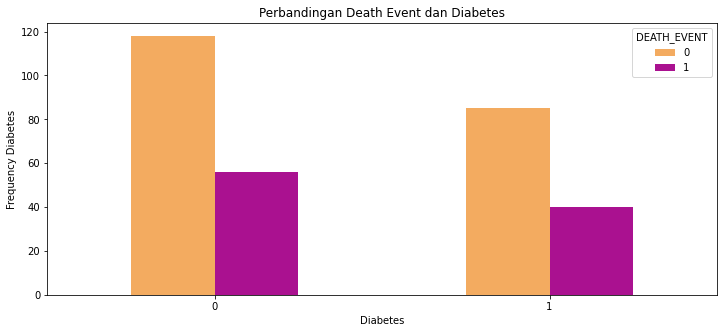

In [12]:
pd.crosstab(data.diabetes, data.DEATH_EVENT).plot(kind="bar",figsize=(12,5),color=["#F3AB60",'#AA1190'])
plt.title('Perbandingan Death Event dan Diabetes')
plt.xlabel('Diabetes')
plt.xticks(rotation = 0)
plt.ylabel('Frequency Diabetes')
plt.show()

Berdasarkan visualisasi diatas, terlihat bahwa seseorang yang tidak mengalami gejala diabetes lebih banyak yang terserang penyakit jantung dibandingkan dengan yang memiliki gejala diabetes. Sehingga dapat dikatakan bahwa penyakit diabetes tidaklah berpengaruh terhadap penyakit jantung.

## Death Even vs High Blood Pressure

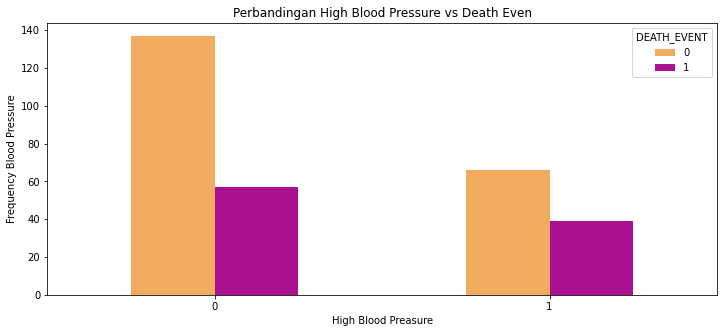

In [13]:
pd.crosstab(data.high_blood_pressure, data.DEATH_EVENT).plot(kind="bar",figsize=(12,5),color=["#F3AB60",'#AA1190'])
plt.title('Perbandingan High Blood Pressure vs Death Even')
plt.xlabel('High Blood Preasure')
plt.xticks(rotation = 0)
plt.ylabel('Frequency Blood Pressure')
plt.show()

Pasien yang tidak memiliki tekanan darah lebih banyak mengalami penyakit jantung dibandingkan dengan yang mengalami tekanan darah. Dengan demikian dapat dikatakan bahwa tekanan darah tidaklah memiliki pengaruh terhadap penyakit jantung.

## Death Even vs Sex (Gender)

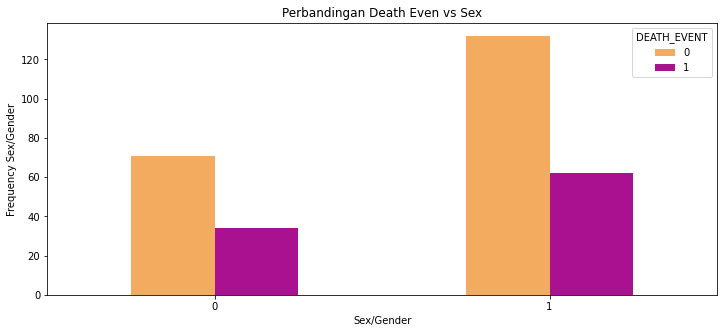

In [14]:
pd.crosstab(data.sex, data.DEATH_EVENT).plot(kind="bar",figsize=(12,5),color=["#F3AB60",'#AA1190'])
plt.title('Perbandingan Death Even vs Sex')
plt.xlabel('Sex/Gender')
plt.xticks(rotation = 0)
plt.ylabel('Frequency Sex/Gender')
plt.show()

Terlihat bahwa kebanyakan pasien penderita penyakit jantung ialah pria dibandingkan dengan wanita. Tentunya berdasarkan informasi ini saya sebagai analis memiliki pertanyaan mengapa demikian? dugaan saya sementara saat ini ialah mungkin disebabkan kebanyakan pria adalah perokok dibanding dengan wanita. Tentu ini hanya sebatas dugaan belaka, perlu dilakukan penelitian lebih lanjut lagi.

Berdasarkan fenomena ini, maka saya memiliki asusmi bahwa jender mempengaruhi penyakit jantung.

## Death Event vs Smoking

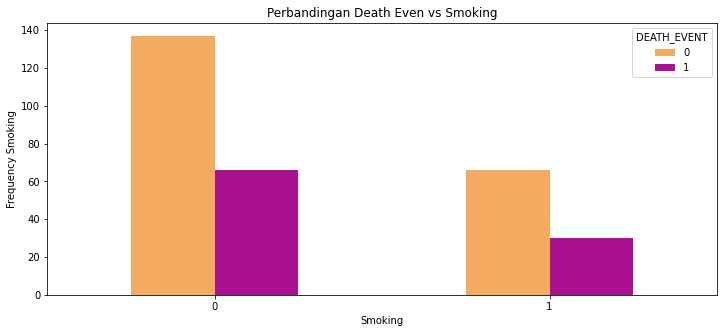

In [15]:
pd.crosstab(data.smoking, data.DEATH_EVENT).plot(kind="bar",figsize=(12,5),color=["#F3AB60",'#AA1190'])
plt.title('Perbandingan Death Even vs Smoking')
plt.xlabel('Smoking')
plt.xticks(rotation = 0)
plt.ylabel('Frequency Smoking')
plt.show()

Terlihat bahwa penyakit jantung di dominasi oleh yang bukan perokok. Fenomena ini tentunya membantah asumsi kita sebelumnya, bahwa pria perokok adalah penyebab penyakit jantung. Namun grafik ini meberikan asumsi tersebut. Tentunya ini perlu analisa lebih lanjut untuk mengetahui mengapa pria lebih banyak terkena penyakit jantung dibandingkan wanita. 

## Death Event vs Cretinie Phospokinase

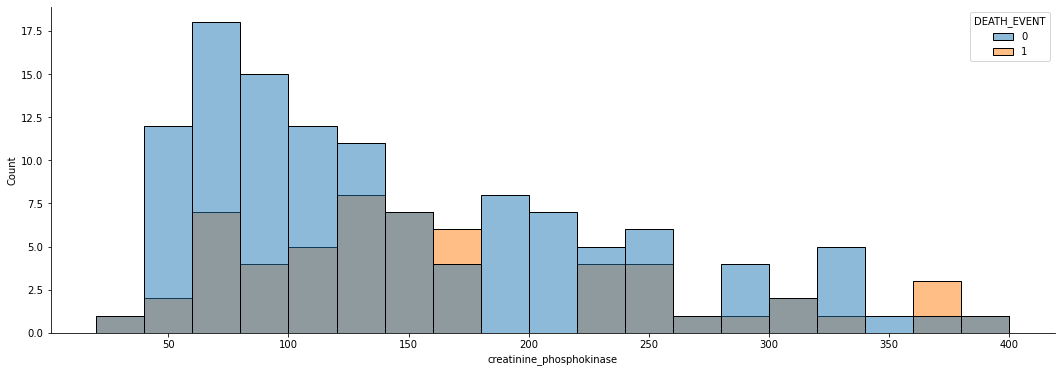

In [16]:
bins = [20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360,380,400]
plt.figure(figsize=(18, 6))
sns.histplot(data=data, x="creatinine_phosphokinase", bins=bins, hue="DEATH_EVENT")
sns.despine(top=True, right=True)

Visualisasi diatas memperlikatkan informasi yang cukup menarik. Jika diperharikan creatinie phospokinase dengan nilai lebih kurang 200 serta lebih kurang 350, tidak terdapat pasien dengan penyakit jantung. Sehingga dapat dikatakan bahwa creatinie mempengaruhi penyakit jantung. 

# **5. DATA PREPROCESSING**

## Data Inference

In [17]:
data_inf = data.sample(10, random_state=12)

## Pisahkan Data Inference dari Dataset

In [18]:
data_train_test = data.drop(data_inf.index)

## Reset Index (Optional)

In [19]:
data_inf.reset_index(drop=True, inplace=True)
data_train_test.reset_index(drop=True, inplace=True)

## Split Dataset

> Split `X` (features) dan `y` (target)

In [20]:
X = data.drop('DEATH_EVENT', axis=1)
y = data.DEATH_EVENT

> Split `traon_set` dan `test-set`

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size=0.2, random_state=17)   # (nilai random_state ini tidak memiliki hubungan dengan random_state di awal)

print("X_train shape:",X_train.shape)
print("X_test shape :",X_test.shape)

X_train shape: (239, 12)
X_test shape : (60, 12)


## Handling Outlier

X_train

In [22]:
num_train = X_train._get_numeric_data() 
for k, v in num_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column age outliers = 0.00%
Column anaemia outliers = 0.00%
Column creatinine_phosphokinase outliers = 8.79%
Column diabetes outliers = 0.00%
Column ejection_fraction outliers = 1.67%
Column high_blood_pressure outliers = 0.00%
Column platelets outliers = 5.86%
Column serum_creatinine outliers = 9.21%
Column serum_sodium outliers = 2.93%
Column sex outliers = 0.00%
Column smoking outliers = 0.00%
Column time outliers = 0.00%


Capping

In [23]:
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium'])

windsoriser.fit(X_test)

X_test_t = windsoriser.transform(X_test)

## Handling Missing Value

In [24]:
mv_xtrain = pd.DataFrame(X_train.isnull().sum(), columns=['No. of missing values'])
mv_xtrain['% missing_values'] = (mv_xtrain/len(X_train)).round(2)*100
mv_xtrain

,No. of missing values,% missing_values
age,0,0.0
anaemia,0,0.0
creatinine_phosphokinase,0,0.0
diabetes,0,0.0
ejection_fraction,0,0.0
high_blood_pressure,0,0.0
platelets,0,0.0
serum_creatinine,0,0.0
serum_sodium,0,0.0
sex,0,0.0


Terlihat bahwa data telah bersih dari adanya missing value

## Feature Selection

Cek Korelasi Columns

In [25]:
korelasi = data.corr()
print(korelasi['DEATH_EVENT'].sort_values(ascending=False), '\n')

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64 



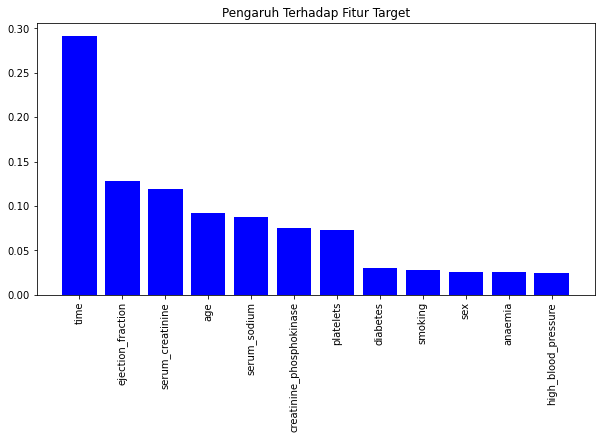

In [26]:
# feature extraction
model = ExtraTreesClassifier(n_estimators=400)
model.fit(X, y)

# feature_importances_ dari highest ke lowest
sorted_idx = np.argsort(model.feature_importances_)
sorted_idx = sorted_idx[::-1]

# plot feature importances
plt.figure(figsize=(10,5))
plt.title("Pengaruh Terhadap Fitur Target")
plt.bar(range(X.shape[1]), model.feature_importances_[sorted_idx],
        color="b", align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Berdasarkan proses EDA, analisis Heatmap, dan melihat fitur terpenting, kami memutuskan untuk memilik kolom beriku :
- age
- creatine phospokinase
- ejection fraction
- platelets
- serum_creatinine
- serum_sodium

In [27]:
X_train = X_train.loc[:, ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']]
X_test = X_test.loc[:, ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']]

## Feature Scaling

Saya hanya menggunakan feature scaling karena data yang saya pilih berpengaruh terhadap target hanyalah data yang numeric

In [28]:
X_train.skew()

age                         0.461221
creatinine_phosphokinase    4.572673
ejection_fraction           0.647752
platelets                   1.770096
serum_creatinine            4.461320
serum_sodium               -1.148646
dtype: float64

In [29]:
scaler1_std = ['age']       # data normal
scaler2_minmax = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium'] # data skew

In [30]:
# Menggabungkan kembali data yang telah dipisahkan
marge = scaler1_std + scaler2_minmax
marge

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium']

In [31]:
# Normalaize
ft = ColumnTransformer([
    ('std',StandardScaler(), scaler1_std),              # untuk data normal
    ('minmax',MinMaxScaler(), scaler2_minmax)])         # untuk data skew

In [32]:
# Membungkus kebali datanya kedalam X_train dan X_test
X_train = X_train[marge]
X_test = X_test[marge]

# **7. PIPELINE & HYPERPARAMETER TUNING**

In [33]:
# PIPELINE
pipeline_rf = Pipeline([
    ('prep',ft),
    ('classifier', RandomForestClassifier())])

Pipeline_gbc = Pipeline([
    ('prep',ft),
    ('classifier', GradientBoostingClassifier())])

# HYPERPARAMETER TUNING

param_rf = {'classifier__max_depth': [10, 50, 100],
            'classifier__max_features': [2, 3],
            'classifier__min_samples_leaf': [3, 4, 5],
            'classifier__min_samples_split': [8, 10, 12],
            'classifier__n_estimators': [100, 200, 300]
            }

param_gbC = {'classifier__learning_rate':[0.1,0.01,0.001],
            'classifier__min_samples_split': [50, 100, 200],
            'classifier__min_samples_leaf': [3, 4, 5],
            'classifier__max_depth': [8, 10, 12],
            'classifier__max_features': [2, 3],
            'classifier__n_estimators':np.arange(100, 501, 100)
            }

# **8. MODEL TRAINIANG**

## Random Forest

In [34]:
model_rf = pipeline_rf.fit(X_train, y_train)       # Model Training

## XGboost

In [35]:
model_xgb = Pipeline_gbc.fit(X_train, y_train)

# **9. MODEL EVALUATION**

## SEBELUM PROSES TUNING

## Random Forest

In [36]:
y_pred_train_rf = model_rf.predict(X_train)
y_pred_test_rf = model_rf.predict(X_test)

In [37]:
print('Clasification Report Train')
print(classification_report(y_train, y_pred_train_rf))

print('Clasification Report Test')
print(classification_report(y_test, y_pred_test_rf))


Clasification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00        77

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239

Clasification Report Test
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        41
           1       0.67      0.42      0.52        19

    accuracy                           0.75        60
   macro avg       0.72      0.66      0.67        60
weighted avg       0.74      0.75      0.73        60



Confusion Matrix Train


<AxesSubplot:>

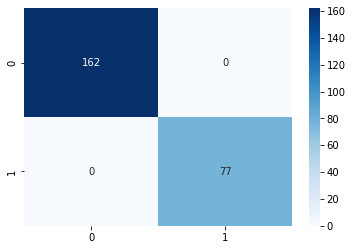

In [38]:
print('Confusion Matrix Train')
matrix_train_rf = confusion_matrix(y_train, y_pred_train_rf)
sns.heatmap(matrix_train_rf, annot=True, cmap='Blues', fmt='g')

Confusion Matrix Test


<AxesSubplot:>

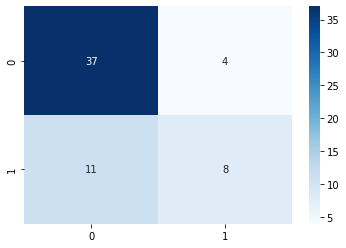

In [39]:
print('Confusion Matrix Test')
matrix_test_rf = confusion_matrix(y_test, y_pred_test_rf)
sns.heatmap(matrix_test_rf, annot=True, cmap='Blues', fmt='g')

Terlihat bahwa pada model Random Forest terjadi overfitting, dimana pada saat train model berhasil memprediksi dengan sempurna, namun pada saat diberikan data test model kurang berhasil memprediksi dengan benar

> ## XGboost

In [40]:
y_pred_train_xgb = model_xgb.predict(X_train)
y_pred_test_xgb = model_xgb.predict(X_test)

In [41]:
print('Clasification Report Train')
print(classification_report(y_train, y_pred_train_xgb))

print('Clasification Report Test')
print(classification_report(y_test, y_pred_test_xgb))


Clasification Report Train
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       162
           1       0.99      0.92      0.95        77

    accuracy                           0.97       239
   macro avg       0.98      0.96      0.97       239
weighted avg       0.97      0.97      0.97       239

Clasification Report Test
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        41
           1       0.50      0.37      0.42        19

    accuracy                           0.68        60
   macro avg       0.62      0.60      0.60        60
weighted avg       0.66      0.68      0.67        60



Confusion Matrix Train


<AxesSubplot:>

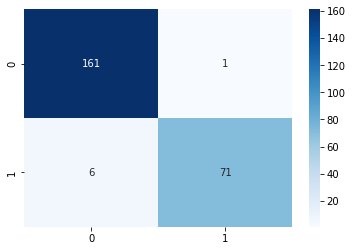

In [42]:
print('Confusion Matrix Train')
matrix_train_xgb = confusion_matrix(y_train, y_pred_train_xgb)
sns.heatmap(matrix_train_xgb, annot=True, cmap='Blues', fmt='g')

Confusion Matrix Test


<AxesSubplot:>

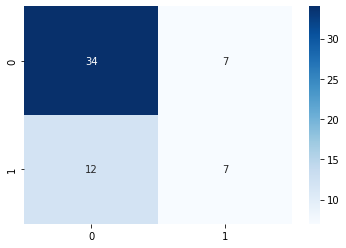

In [43]:
print('Confusion Matrix Test')
matrix_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)
sns.heatmap(matrix_test_xgb, annot=True, cmap='Blues', fmt='g')

## SETELAH PROSES TUNING

## Random Forest

In [44]:
from sklearn.model_selection import GridSearchCV
grid_rf = GridSearchCV(pipeline_rf, param_rf, cv=5)

model_terbaik_grid_rf = grid_rf.fit(X_train,y_train)
estimator_terbaik_grid_rf = grid_rf.best_estimator_

In [45]:
print('Parameter terbaik', grid_rf.best_params_)

Parameter terbaik {'classifier__max_depth': 10, 'classifier__max_features': 2, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}


In [46]:
y_pred_train_tuning = estimator_terbaik_grid_rf.predict(X_train)
y_pred_test_tuning = estimator_terbaik_grid_rf.predict(X_test)

print('Classification Report Train')
print(classification_report(y_train, y_pred_train_tuning))

print('Classification Report Test')
print(classification_report(y_test, y_pred_test_tuning))

Classification Report Train
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       162
           1       0.93      0.73      0.82        77

    accuracy                           0.90       239
   macro avg       0.91      0.85      0.87       239
weighted avg       0.90      0.90      0.89       239

Classification Report Test
              precision    recall  f1-score   support

           0       0.78      0.93      0.84        41
           1       0.73      0.42      0.53        19

    accuracy                           0.77        60
   macro avg       0.75      0.67      0.69        60
weighted avg       0.76      0.77      0.75        60



Confusion Matrix Train


<AxesSubplot:>

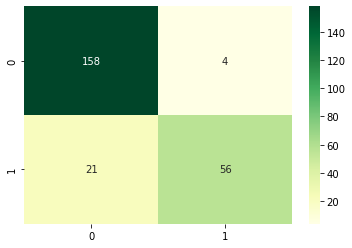

In [47]:
print('Confusion Matrix Train')
matrix_train_rf_tunning = confusion_matrix(y_train, y_pred_train_tuning)
sns.heatmap(matrix_train_rf_tunning, annot=True, cmap='YlGn', fmt='g')

Confusion Matrix Test


<AxesSubplot:>

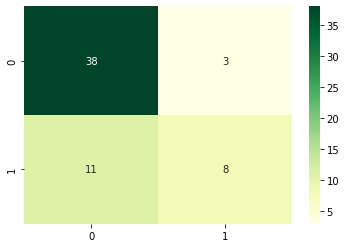

In [48]:
print('Confusion Matrix Test')
matrix_test_rf_tuning = confusion_matrix(y_test, y_pred_test_tuning)
sns.heatmap(matrix_test_rf_tuning, annot=True, cmap='YlGn', fmt='g')

## XGboost

In [49]:
grid_xgb = GridSearchCV(Pipeline_gbc, param_gbC, cv=5)

model_terbaik_grid_xgb = grid_xgb.fit(X_train,y_train)
estimator_terbaik_grid_xgb = grid_xgb.best_estimator_

In [50]:
print('Parameter terbaik', grid_xgb.best_params_)

Parameter terbaik {'classifier__learning_rate': 0.01, 'classifier__max_depth': 10, 'classifier__max_features': 3, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 50, 'classifier__n_estimators': 300}


In [51]:
y_pred_train_tuning_xgb = estimator_terbaik_grid_xgb.predict(X_train)
y_pred_test_tuning_xgb = estimator_terbaik_grid_xgb.predict(X_test)

print('Classification Report Train')
print(classification_report(y_train, y_pred_train_tuning_xgb))

print('Classification Report Test')
print(classification_report(y_test, y_pred_test_tuning_xgb))

Classification Report Train
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       162
           1       0.91      0.81      0.86        77

    accuracy                           0.91       239
   macro avg       0.91      0.88      0.90       239
weighted avg       0.91      0.91      0.91       239

Classification Report Test
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        41
           1       0.69      0.58      0.63        19

    accuracy                           0.78        60
   macro avg       0.75      0.73      0.74        60
weighted avg       0.78      0.78      0.78        60



Confusion Matrix Train


<AxesSubplot:>

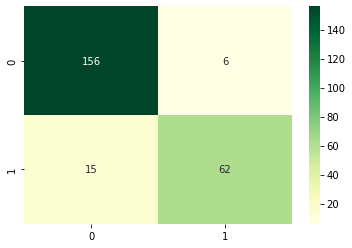

In [52]:
print('Confusion Matrix Train')
matrix_train_xgb_tuning = confusion_matrix(y_train, y_pred_train_tuning_xgb)
sns.heatmap(matrix_train_xgb_tuning, annot=True, cmap='YlGn', fmt='g')

Confusion Matrix Train


<AxesSubplot:>

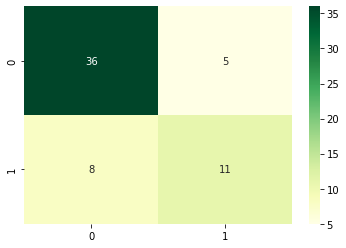

In [53]:
print('Confusion Matrix Train')
matrix_test_xgb_tuning = confusion_matrix(y_test, y_pred_test_tuning_xgb)
sns.heatmap(matrix_test_xgb_tuning, annot=True, cmap='YlGn', fmt='g')

# Pemilihan Model Terbaik

**SEBELUM PROSES TUNING**

Random Forest 
- label 0 : 37 terprediksi benar, 4 salah
- label 1 : 8 terprediksi benar, 11 salah

XG Boost 
- label 0 : 34 terprediksi benar, 7 salah
- label 1 : 12 terprediksi benar, 7 salah

**SETELAH PROSES TUNING**

Random Forest  
- label 0 : 39 terprediksi benar, 2 salah
- label 1 : 8 terprediksi benar, 11 salah

XG Boost 
- label 0 : 37 terprediksi benar, 4 salah
- label 1 : 12 terprediksi benar, 8 salah

Berdasarkan analisis yang dilakuakan terhadap test model berdasarkan matrix confussion, saya memilih untuk menggunakan model XGboost yang telah di tunning karena menghasilkan nilai prediksi yang lebih baik dibandingkan model yang lain.

# **10. SAVING MODEL**

In [54]:
with open('default_rf', 'wb') as file_1:
    pickle.dump(model_rf, file_1)

with open('default_XGboost', 'wb') as file_2:
    pickle.dump(model_xgb, file_2)

with open('rf_tuning.pkl', 'wb') as file_3:
    pickle.dump(model_terbaik_grid_rf, file_3)

with open('XGboost_tuning.pkl', 'wb') as file_4:
    pickle.dump(model_terbaik_grid_xgb, file_4)

with open('all_feature.txt','w') as file_5 :
    file_5.write(str(marge))

# **11. MODEL INFERENCE**

## Load Model

In [55]:
with open('XGboost_tuning.pkl', 'rb') as file_4:
    XGboost_tuning = pickle.load(file_4)

with open('all_feature.txt', 'r') as file_5:
    all_columns_feature = file_5.read()

In [56]:
data_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,58.0,0,132,1,38,1,253000.00,1.00,139,1,0,230,0
1,68.0,1,646,0,25,0,305000.00,2.10,130,1,0,108,0
2,60.0,1,2281,1,40,0,283000.00,1.00,141,0,0,187,0
3,75.0,1,582,0,30,0,225000.00,1.83,134,1,0,113,1
4,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
5,82.0,1,855,1,50,1,321000.00,1.00,145,0,0,30,1
6,46.0,0,168,1,17,1,271000.00,2.10,124,0,0,100,1
7,58.0,1,57,0,25,0,189000.00,1.30,132,1,1,205,0
8,80.0,0,582,1,35,0,350000.00,2.10,134,1,0,174,0
9,42.0,0,64,0,30,0,215000.00,3.80,128,1,1,250,0


## Convert Column

In [57]:
all_columns_feature = ast.literal_eval(all_columns_feature)
data_inf_fix = data_inf[all_columns_feature]

## Predict

In [58]:
y_inf_pred_xgb = XGboost_tuning.predict(data_inf_fix)
y_inf_pred_xgb

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [59]:
y_inf_pred_xgb1 = pd.DataFrame(y_inf_pred_xgb, columns=['Predict Best XGBoost Tuning'])
hasil_prediksi =pd.concat([data_inf, y_inf_pred_xgb1],axis=1)
hasil_prediksi

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Predict Best XGBoost Tuning
0,58.0,0,132,1,38,1,253000.00,1.00,139,1,0,230,0,0
1,68.0,1,646,0,25,0,305000.00,2.10,130,1,0,108,0,0
2,60.0,1,2281,1,40,0,283000.00,1.00,141,0,0,187,0,0
3,75.0,1,582,0,30,0,225000.00,1.83,134,1,0,113,1,1
4,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1,1
5,82.0,1,855,1,50,1,321000.00,1.00,145,0,0,30,1,1
6,46.0,0,168,1,17,1,271000.00,2.10,124,0,0,100,1,1
7,58.0,1,57,0,25,0,189000.00,1.30,132,1,1,205,0,0
8,80.0,0,582,1,35,0,350000.00,2.10,134,1,0,174,0,1
9,42.0,0,64,0,30,0,215000.00,3.80,128,1,1,250,0,0


# **12. KESIMPULAN**

----

## EDA

- Death Event didomonasi oleh label 0 (hidup) dengan persentase 67.9% daripada label 1 (Meninggal) dengan persentase 32.1%

- Age lumayan berpengaruh terhadap paseian yang meninggal dengan penyakit jantung. Hal ini dapat dilihat dari rentang usia 80 - 90 tahuan yang memiliki peluang meninggal lebih besar dibandingkan dengan rentang usia yang 70 tahun kebawah.

- Pasien dengan penyakit jantung yang meninggal tertinggi berada pada usia 60 - 70 tahun. Hal ini tentunya memberi informasi kepada kita bahwa sangat sedikit jumlah pasien yang melewati usia 70 tahun keatas. Sehingga kasus kematian terbanyak berada pada rentang usia tersebut.

- Pasien tanpa gejala anemia lebih banyak yang mengalami kematian dengan penyakit jantung dibandingkan yang memiliki gejala anemia. Sehingga berdasarkan pengamatan ini dapat dikatakan bahwa anemia tidaklah berpengaruh terhadap penyakit jantung

- seseorang yang tidak mengalami gejala diabetes lebih banyak yang terserang penyakit jantung dibandingkan dengan yang memiliki gejala diabetes. Sehingga dapat dikatakan bahwa penyakit diabetes tidaklah berpengaruh terhadap penyakit jantung.

- asien yang tidak memiliki tekanan darah lebih banyak mengalami penyakit jantung dibandingkan dengan yang mengalami tekanan darah. Dengan demikian dapat dikatakan bahwa tekanan darah tidaklah memiliki pengaruh terhadap penyakit jantung.

- Terlihat bahwa kebanyakan pasien penderita penyakit jantung ialah pria dibandingkan dengan wanita. Tentunya berdasarkan informasi ini saya sebagai analis memiliki pertanyaan mengapa demikian? dugaan saya sementara saat ini ialah mungkin disebabkan kebanyakan pria adalah perokok dibanding dengan wanita. Tentu ini hanya sebatas dugaan belaka, perlu dilakukan penelitian lebih lanjut lagi. Berdasarkan fenomena ini, maka saya memiliki asusmi bahwa jender mempengaruhi penyakit jantung.

- penyakit jantung di dominasi oleh yang bukan perokok. Fenomena ini tentunya membantah asumsi kita sebelumnya, bahwa pria perokok adalah penyebab penyakit jantung. Namun grafik ini meberikan asumsi tersebut. Tentunya ini perlu analisa lebih lanjut untuk mengetahui mengapa pria lebih banyak terkena penyakit jantung dibandingkan wanita

-  creatinie phospokinase dengan nilai lebih kurang 200 serta lebih kurang 350, tidak terdapat pasien dengan penyakit jantung. Sehingga dapat dikatakan bahwa creatinie mempengaruhi penyakit jantung. 

## Fitur Yang Berkorelasi Terhadap Target

Berdasarkan hasil analisis menggunakan EDA, Heatmap dan Feature Tepenting maka saya mendapatkan informasi yang mempengaruhi penyakit jantung ialah : age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine dan serum_sodium.

## Model

**SEBELUM PROSES TUNING**

Random Forest 
- label 0 : 37 terprediksi benar, 4 salah
- label 1 : 8 terprediksi benar, 11 salah

XG Boost 
- label 0 : 34 terprediksi benar, 7 salah
- label 1 : 12 terprediksi benar, 7 salah

**SETELAH PROSES TUNING**

Random Forest  
- label 0 : 39 terprediksi benar, 2 salah
- label 1 : 8 terprediksi benar, 11 salah

XG Boost 
- label 0 : 37 terprediksi benar, 4 salah
- label 1 : 12 terprediksi benar, 8 salah

Berdasarkan analisis yang dilakuakan terhadap test model berdasarkan matrix confussion, saya memilih untuk menggunakan model XGboost yang telah di tunning karena menghasilkan nilai prediksi yang lebih baik dibandingkan model yang lain.

## Conceptual Problems

----

Jawab pertanyaan berikut:

1. Apakah yang dimaksud dengan Bagging?

2. Jelaskan perbedaan algoritma Random Forest dengan algoritma boosting yang Anda pilih?

Answere

1. Bagging adalah salah bagian satu dari ensemble learning. Bagging juga dikenal dengan bootstrap aggregating dimana prosesnya menggunakan beberapa model dari algoritma yang sama, dan melatih model pada sample berbeda dari dataset yang sama. Prediksi yang dibuat oleh setiap model kemudian digabungkan menggunakan statistik seperti voting atau rata-rata

2. Perbedaan dasar antara random forest dan algoritma boosting ialah :
- Random forest bekerja pada bagging, aggregation setra memiliki prosenya lebih cepat secara komputasi
- XGBoost bekerja pada boosting dan merupakan pelajar yang lemah, namun boosting cukup baik digunakan dalam masalah klasifikasi 